In [1]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


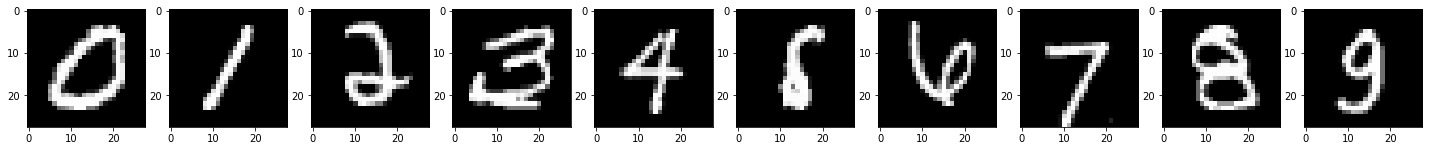

In [4]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

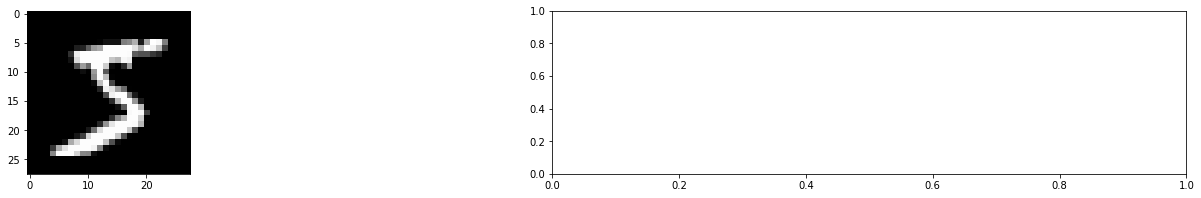

In [17]:
img = x_train[0]
fig, axs = plt.subplots(1, 2, figsize=(25, 3))
axs[0].imshow(Image.fromarray(img), cmap='gray')
plt.show() 

In [18]:
# разделим выборку на четные и нечетные

In [45]:
x_train_even = []
x_train_odd = []
y_train_even = []
y_train_odd = []

x_test_even = []
x_test_odd = []
y_test_even = []
y_test_odd = []

In [46]:
# делим выборку на четные и нечетные числа
k = 0
for x in x_train:
  if y_train[k] % 2 == 0:
    x_train_even.append(x)
    y_train_even.append(y_train[k])
  else:
    x_train_odd.append(x)
    y_train_odd.append(y_train[k])
  k += 1 

x_train_even = np.array(x_train_even)
x_train_odd = np.array(x_train_odd)
y_train_even = np.array(y_train_even)
y_train_odd = np.array(y_train_odd)

In [47]:
# делим выборку на четные и нечетные числа
k = 0
for x in x_test:
  if y_train[k] % 2 == 0:
    x_test_even.append(x)
    y_test_even.append(y_test[k])
  else:
    x_test_odd.append(x)
    y_test_odd.append(y_test[k])
  k += 1 

x_test_even = np.array(x_test_even)
x_test_odd = np.array(x_test_odd)
y_test_even = np.array(y_test_even)
y_test_odd = np.array(y_test_odd)

In [53]:
### сеть для четных чисел

In [57]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train_even, 10)
y_test = utils.to_categorical(y_test_even, 10)

#Меняем формат данных MNIST
#Надо добавить в конце размерность 1
#Чтобы свёрточная сеть понимала, что это чёрно-белые данные
x_train = x_train_even.reshape(x_train_even.shape[0], 28, 28, 1)
x_test = x_test_even.reshape(x_test_even.shape[0], 28, 28, 1)

In [58]:
# Посмотрим форматы выборок перед обучением
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(29492, 28, 28, 1)
(4930, 28, 28, 1)
(29492, 10)
(4930, 10)


In [50]:
# нейронная сеть

In [59]:
#задаём batch_size
batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(28, 28, 1)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(256, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)             

In [61]:
#Обучаем сеть на данных mnist
history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)
                  

Epoch 1/15
231/231 [==============================] - 91s 388ms/step - loss: 0.1180 - accuracy: 0.9620 - val_loss: 6.7582 - val_accuracy: 0.4913
Epoch 2/15
231/231 [==============================] - 98s 424ms/step - loss: 0.0278 - accuracy: 0.9907 - val_loss: 6.4867 - val_accuracy: 0.4892
Epoch 3/15
231/231 [==============================] - 83s 358ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 6.3790 - val_accuracy: 0.4909
Epoch 4/15
231/231 [==============================] - 78s 338ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 7.5744 - val_accuracy: 0.4909
Epoch 5/15
231/231 [==============================] - 79s 343ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 8.7099 - val_accuracy: 0.4911
Epoch 6/15
231/231 [==============================] - 77s 333ms/step - loss: 0.0091 - accuracy: 0.9964 - val_loss: 8.9626 - val_accuracy: 0.4905
Epoch 7/15
231/231 [==============================] - 79s 344ms/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 9.6971 - val_ac

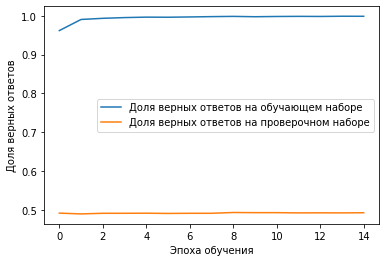

In [62]:
#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [63]:
#Выбираем номер пример
n = np.random.randint(x_test.shape[0])
#Получаем выход сети на этом примере
prediction = model.predict(x_test)

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", np.argmax(y_test[n]))

155/155 [==============================] - 3s 21ms/step
Выход сети:  [9.0788814e-16 8.5308659e-17 5.5150294e-16 1.4954547e-17 3.8367547e-12
 8.9873473e-19 9.9999994e-01 6.9384225e-19 2.4473717e-13 6.4223399e-16]
Распознанная цифра:  6
Верный ответ:  6


In [64]:
model_even = model

In [ ]:
### сеть для нечетных чисел

In [65]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train_odd, 10)
y_test = utils.to_categorical(y_test_odd, 10)

#Меняем формат данных MNIST
#Надо добавить в конце размерность 1
#Чтобы свёрточная сеть понимала, что это чёрно-белые данные
x_train = x_train_odd.reshape(x_train_odd.shape[0], 28, 28, 1)
x_test = x_test_odd.reshape(x_test_odd.shape[0], 28, 28, 1)

In [66]:
# Посмотрим форматы выборок перед обучением
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30508, 28, 28, 1)
(5070, 28, 28, 1)
(30508, 10)
(5070, 10)


In [ ]:
# нейронная сеть

In [67]:
#задаём batch_size
batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(28, 28, 1)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(256, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 6272)             

In [69]:
#Обучаем сеть на данных mnist
history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)
                  

Epoch 1/15
239/239 [==============================] - 83s 343ms/step - loss: 0.1189 - accuracy: 0.9593 - val_loss: 6.8526 - val_accuracy: 0.5043
Epoch 2/15
239/239 [==============================] - 79s 332ms/step - loss: 0.0350 - accuracy: 0.9901 - val_loss: 6.4334 - val_accuracy: 0.5061
Epoch 3/15
239/239 [==============================] - 82s 342ms/step - loss: 0.0223 - accuracy: 0.9933 - val_loss: 6.9837 - val_accuracy: 0.5049
Epoch 4/15
239/239 [==============================] - 81s 340ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 7.4872 - val_accuracy: 0.5071
Epoch 5/15
239/239 [==============================] - 79s 331ms/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 8.0505 - val_accuracy: 0.5069
Epoch 6/15
239/239 [==============================] - 81s 340ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 8.8806 - val_accuracy: 0.5061
Epoch 7/15
239/239 [==============================] - 79s 332ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 8.5107 - val_ac

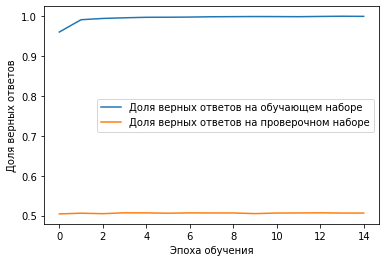

In [70]:
#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [71]:
#Выбираем номер пример
n = np.random.randint(x_test.shape[0])
#Получаем выход сети на этом примере
prediction = model.predict(x_test)

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", np.argmax(y_test[n]))

159/159 [==============================] - 3s 21ms/step
Выход сети:  [2.1500183e-22 2.1723001e-24 5.6876635e-24 3.1128283e-16 7.2261514e-23
 2.8494271e-17 2.2568990e-22 1.6666864e-15 9.3233381e-23 9.9999994e-01]
Распознанная цифра:  9
Верный ответ:  9


In [72]:
model_odd = model